# 5.1 - SENTIMENT ANALYSIS - *Label Propagation*

Per eseguire l'analisi dei tweet scritti dagli utenti nelle comunità identificate con l'algoritmo **label propagation** sul processo di Johnny Depp e Amber Heard verrà utilizzato il modello **VADER ( Valence Aware Dictionary for Sentiment Reasoning)**, sensibile sia alla polarità (positivo/negativo) che all'intensità dell'emozione.

In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords 

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('stopwords')
sentiment = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# COMUNITÀ 0

In [3]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df = pd.read_csv('../data_collection/data/df_lp_coms_0.csv')
del df['Unnamed: 0']

In [5]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,Unnamed: 0.1,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f
0,2022-04-27,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,nice people stopped saying bpd hpd form npd di...,[],3,0,0,johnnydeppvsamberheard deppvsheard,[],NaN,"['nice', 'people', 'stopped', 'saying', 'bpd',...",1,17,117,5.555556,NaN
1,2022-04-26,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,deposition x longer need got message loud clea...,[],0,1,28,deppvsheard johnnydeppvsamberheard justicefor...,[],NaN,"['deposition', 'x', 'longer', 'need', 'got', '...",1,17,109,5.470588,NaN
2,2022-04-29,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,believe wish tomorrow monday could keep going ...,[],3,0,29,johnnydeppvsamberheard deppvsheard deppheardt...,[],NaN,"['believe', 'wish', 'tomorrow', 'monday', 'cou...",1,8,51,5.500000,NaN
3,2022-05-01,1240483469794435077,brelana88,Bre 🏴‍☠️🪷,hope come next defamation min biased bullcrap ...,"[{'screen_name': '60mins', 'name': '60 minutes...",2,0,14,justiceforjohnnydepp johnnydepp deppvsheard j...,[],NaN,"['hope', 'come', 'next', 'defamation', 'min', ...",1,15,89,5.000000,johnny
4,2022-05-01,1389997216014688259,govchad,Florida Farmer ,literally,[],0,0,0,deppvsheard depptrial depp,[],NaN,['literally'],1,1,9,9.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,2022-05-27,217418435,spacekidette,Space Kidette Rando 007🚀,case misogyny amber claim world applauding que...,[],0,2,18,deppvsheardtrial johnnydeppisinnocent deppheard,[],2659.0,"['case', 'misogyny', 'amber', 'claim', 'world'...",1,14,100,6.214286,amber
10779,2022-05-28,1522000591232200705,parlousbitch,whitney heard’s tampon applicator,watching uncivillaw stream right goddamn kurt ...,"[{'screen_name': 'uncivillaw', 'name': 'uncivi...",2,0,5,lawtube uncivillaw deppheard,[],2677.0,"['watching', 'uncivillaw', 'stream', 'right', ...",1,20,156,6.850000,NaN
10780,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,[],3173.0,"['monica', 'lewinsky', 'join', 'depp', 'heard'...",1,6,38,5.500000,NaN
10781,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,[],3209.0,"['monica', 'lewinsky', 'join', 'depp', 'heard'...",1,6,38,5.500000,NaN


In [6]:
df['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df['tweet'].astype(str)]
df['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df['tweet'].astype(str)]
df['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df['tweet'].astype(str)]
df['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df['tweet'].astype(str)]

In [7]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos
0,2022-04-27,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,nice people stopped saying bpd hpd form npd di...,[],3,0,0,johnnydeppvsamberheard deppvsheard,...,"['nice', 'people', 'stopped', 'saying', 'bpd',...",1,17,117,5.555556,NaN,-0.0772,0.196,0.670,0.134
1,2022-04-26,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,deposition x longer need got message loud clea...,[],0,1,28,deppvsheard johnnydeppvsamberheard justicefor...,...,"['deposition', 'x', 'longer', 'need', 'got', '...",1,17,109,5.470588,NaN,-0.2500,0.228,0.644,0.129
2,2022-04-29,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,believe wish tomorrow monday could keep going ...,[],3,0,29,johnnydeppvsamberheard deppvsheard deppheardt...,...,"['believe', 'wish', 'tomorrow', 'monday', 'cou...",1,8,51,5.500000,NaN,0.4019,0.000,0.722,0.278
3,2022-05-01,1240483469794435077,brelana88,Bre 🏴‍☠️🪷,hope come next defamation min biased bullcrap ...,"[{'screen_name': '60mins', 'name': '60 minutes...",2,0,14,justiceforjohnnydepp johnnydepp deppvsheard j...,...,"['hope', 'come', 'next', 'defamation', 'min', ...",1,15,89,5.000000,johnny,-0.5994,0.377,0.483,0.140
4,2022-05-01,1389997216014688259,govchad,Florida Farmer ,literally,[],0,0,0,deppvsheard depptrial depp,...,['literally'],1,1,9,9.000000,NaN,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,2022-05-27,217418435,spacekidette,Space Kidette Rando 007🚀,case misogyny amber claim world applauding que...,[],0,2,18,deppvsheardtrial johnnydeppisinnocent deppheard,...,"['case', 'misogyny', 'amber', 'claim', 'world'...",1,14,100,6.214286,amber,0.4767,0.000,0.807,0.193
10779,2022-05-28,1522000591232200705,parlousbitch,whitney heard’s tampon applicator,watching uncivillaw stream right goddamn kurt ...,"[{'screen_name': 'uncivillaw', 'name': 'uncivi...",2,0,5,lawtube uncivillaw deppheard,...,"['watching', 'uncivillaw', 'stream', 'right', ...",1,20,156,6.850000,NaN,-0.2263,0.240,0.554,0.207
10780,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,...,"['monica', 'lewinsky', 'join', 'depp', 'heard'...",1,6,38,5.500000,NaN,-0.2960,0.354,0.417,0.229
10781,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,...,"['monica', 'lewinsky', 'join', 'depp', 'heard'...",1,6,38,5.500000,NaN,-0.2960,0.354,0.417,0.229


In [8]:
#imposto le soglie
df['sentimenti']=''
df.loc[df.compound >= 0.001,'sentimenti']='POSITIVO'
df.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df.loc[df.compound <= -0.001,'sentimenti']='NEGATIVO'

In [9]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-27,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,nice people stopped saying bpd hpd form npd di...,[],3,0,0,johnnydeppvsamberheard deppvsheard,...,1,17,117,5.555556,NaN,-0.0772,0.196,0.670,0.134,NEGATIVO
1,2022-04-26,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,deposition x longer need got message loud clea...,[],0,1,28,deppvsheard johnnydeppvsamberheard justicefor...,...,1,17,109,5.470588,NaN,-0.2500,0.228,0.644,0.129,NEGATIVO
2,2022-04-29,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,believe wish tomorrow monday could keep going ...,[],3,0,29,johnnydeppvsamberheard deppvsheard deppheardt...,...,1,8,51,5.500000,NaN,0.4019,0.000,0.722,0.278,POSITIVO
3,2022-05-01,1240483469794435077,brelana88,Bre 🏴‍☠️🪷,hope come next defamation min biased bullcrap ...,"[{'screen_name': '60mins', 'name': '60 minutes...",2,0,14,justiceforjohnnydepp johnnydepp deppvsheard j...,...,1,15,89,5.000000,johnny,-0.5994,0.377,0.483,0.140,NEGATIVO
4,2022-05-01,1389997216014688259,govchad,Florida Farmer ,literally,[],0,0,0,deppvsheard depptrial depp,...,1,1,9,9.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,2022-05-27,217418435,spacekidette,Space Kidette Rando 007🚀,case misogyny amber claim world applauding que...,[],0,2,18,deppvsheardtrial johnnydeppisinnocent deppheard,...,1,14,100,6.214286,amber,0.4767,0.000,0.807,0.193,POSITIVO
10779,2022-05-28,1522000591232200705,parlousbitch,whitney heard’s tampon applicator,watching uncivillaw stream right goddamn kurt ...,"[{'screen_name': 'uncivillaw', 'name': 'uncivi...",2,0,5,lawtube uncivillaw deppheard,...,1,20,156,6.850000,NaN,-0.2263,0.240,0.554,0.207,NEGATIVO
10780,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,...,1,6,38,5.500000,NaN,-0.2960,0.354,0.417,0.229,NEGATIVO
10781,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,...,1,6,38,5.500000,NaN,-0.2960,0.354,0.417,0.229,NEGATIVO


In [10]:
df["sentimenti"].value_counts()

NEGATIVO    3927
POSITIVO    3657
NEUTRALE    3199
Name: sentimenti, dtype: int64

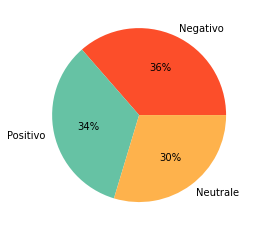

In [11]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c', 'red']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('plots/sentiment_analysis/lp0_pieplt.png')
plt.show()

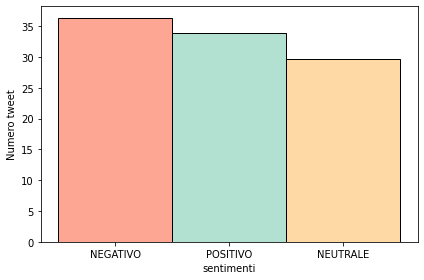

In [12]:
sns.set_palette("Set2")
colors = ['#fc4e2a', "#66c2a4", '#feb24c']
sns.histplot(x="sentimenti", data=df, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('plots/sentiment_analysis/lp0_barplt.png')
plt.show()

In [13]:
tok_pos = ' '.join(df[df['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['believe',
 'wish',
 'tomorrow',
 'monday',
 'could',
 'keep',
 'going',
 'trial',
 'every',
 'time',
 'celebrity',
 'come',
 'support',
 'johnny',
 'depp',
 'amber',
 'heard',
 'supporter',
 'take',
 'moment',
 'think',
 'friend',
 'though',
 'pay',
 'penthouse',
 'living',
 'jet',
 'set',
 'lifestyle',
 'love',
 'lumberlaw',
 'legalbytesmedia',
 'hoeglaw',
 'lawtube',
 'actually',
 'make',
 'timeline',
 'every',
 'incident',
 'depp',
 'heard',
 'side',
 'line',
 'others',
 'claim',
 'witness',
 'etc',
 'better',
 'overview',
 'case',
 'worth',
 'watch',
 'point',
 'case',
 'brief',
 'changed',
 'story',
 'via',
 'natlawyerchic',
 'lol',
 'picture',
 'posted',
 'uk',
 'paper',
 'ok',
 'courttv',
 '🙄🙄🙄🙄',
 'amber',
 'heard',
 'never',
 'scared',
 'johnny',
 'depp',
 'ever',
 'best',
 'thing',
 'come',
 'especially',
 'stumbled',
 'community',
 'trial',
 'bestest',
 'legalbytesmedia',
 '💙',
 'rest',
 'thing',
 'coming',
 'case',
 'heartbreaking',
 '💔',
 'niermanjoe',
 'rekietalaw',
 'n

In [14]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber      792
johnny     452
heard      345
depp       257
witness    250
jury       228
trial      220
camille    216
love       210
good       209
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

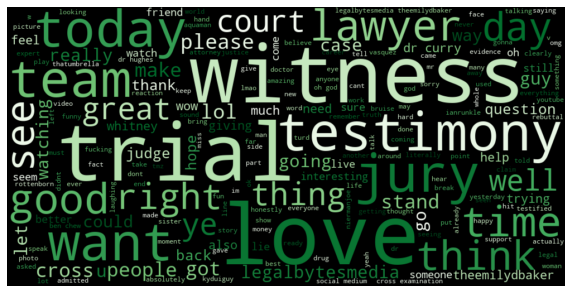

In [15]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp0_wc_pos.png')
plt.axis('off')

In [16]:
tok_neg= ' '.join(df[df['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['nice',
 'people',
 'stopped',
 'saying',
 'bpd',
 'hpd',
 'form',
 'npd',
 'difference',
 'narcissistic',
 'actually',
 'npd',
 'cluster',
 'b',
 'enough',
 'stigma',
 'already',
 'stop',
 'deposition',
 'x',
 'longer',
 'need',
 'got',
 'message',
 'loud',
 'clear',
 'complain',
 'cooperate',
 'appear',
 'officer',
 'da',
 'victim',
 'call',
 'day',
 'overkill',
 'hope',
 'come',
 'next',
 'defamation',
 'min',
 'biased',
 'bullcrap',
 'smear',
 'c',
 'aign',
 'ever',
 'seen',
 'johnny',
 'depp',
 'shameful',
 '😂😂😂🤣🤣😂😂',
 'supporter',
 'think',
 'dr',
 'hughes',
 'board',
 'cert',
 'matter',
 'shit',
 'show',
 'testimony',
 'wonder',
 'eve',
 'low',
 'key',
 'speaking',
 'low',
 'self',
 'esteem',
 'look',
 'amber',
 '🤔',
 'someone',
 'gender',
 'behavior',
 'stop',
 'making',
 'gender',
 'bad',
 'behavior',
 'believe',
 'doctor',
 'wrong',
 'pr',
 'guy',
 'working',
 'overtime',
 '🙄🙄🙄🙄',
 'might',
 'dumbest',
 'fucking',
 'thing',
 'read',
 'week',
 'surprised',
 'perfect',
 'threa

In [17]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        1062
johnny        523
heard         401
witness       255
depp          253
dr            233
elaine        219
shit          216
testimony     199
time          194
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

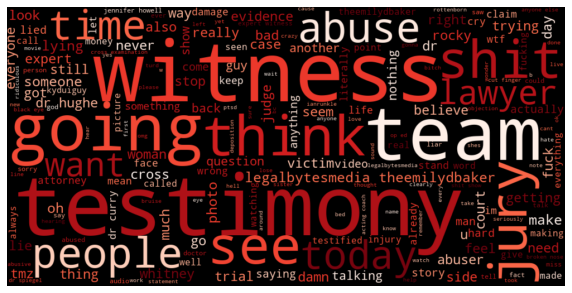

In [18]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp0_wc_neg.png')
plt.axis('off')

In [19]:
tok_neu= ' '.join(df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['literally',
 'dr',
 'hughes',
 'regurgitating',
 'someone',
 'else',
 'fact',
 'remember',
 'report',
 'advocatingfreed',
 'judge',
 'catch',
 'meeeeeeee',
 'advocatingfreed',
 'judge',
 'catch',
 'meeeeeeee',
 'advocatingfreed',
 'judge',
 'catch',
 'meeeeeeee',
 'rewatching',
 'coverage',
 'last',
 'week',
 'difference',
 'dr',
 'hughes',
 'dr',
 'curry',
 'astonishing',
 'come',
 'across',
 'forensic',
 'psychologist',
 'come',
 'across',
 'hired',
 'advocate',
 'woman',
 'ahs',
 'testimony',
 'prof',
 'judge',
 'others',
 'standard',
 'action',
 'amber',
 'heard',
 'jussie',
 'smollett',
 'body',
 'language',
 'word',
 'v',
 'action',
 'funniest',
 'shit',
 'seen',
 'day',
 '😂',
 'think',
 'remove',
 'amber',
 'heard',
 'aclu',
 'ambassador',
 'sign',
 'petition',
 'via',
 'change',
 'someone',
 'gonna',
 'need',
 'bigger',
 'bus',
 'tt',
 'er',
 'going',
 'field',
 'day',
 'legalbytesmedia',
 'theemilydbaker',
 'gave',
 'u',
 'non',
 'coke',
 'head',
 'lesson',
 'coke',
 'coming

In [20]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber              501
heard              272
johnny             244
theemilydbaker     200
elaine             200
legalbytesmedia    191
dr                 185
witness            182
depp               163
camille            139
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

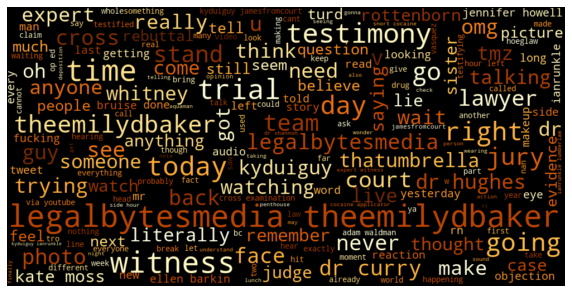

In [21]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords =stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp0_wc_neg_.png')
plt.axis('off')

# COMUNITÀ 1

In [22]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df1 = pd.read_csv('../data_collection/data/df_lp_coms_1.csv')
del df1['Unnamed: 0']

In [23]:
df1

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,Unnamed: 0.1,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f
0,2022-04-15,46124744,sweetestsands,Sweetest Sands -𝒥ustice 𝐹or 𝒥ohnny 𝒟epp 🏴‍☠️,eve barf load pathetic,[],0,1,6,deppvheard deppvsheard johnnydeppvsamberheard...,[],NaN,"['eve', 'barf', 'load', 'pathetic']",1,4,22,4.750000,NaN
1,2022-04-15,46124744,sweetestsands,Sweetest Sands -𝒥ustice 𝐹or 𝒥ohnny 𝒟epp 🏴‍☠️,device court 🤐,[],0,1,2,bullying doxed johnnydepp justiceforjohnnydep...,[],NaN,"['device', 'court', '🤐']",1,3,14,4.000000,NaN
2,2022-04-15,46124744,sweetestsands,Sweetest Sands -𝒥ustice 𝐹or 𝒥ohnny 𝒟epp 🏴‍☠️,eve barf load pathetic,[],0,1,6,deppvheard deppvsheard johnnydeppvsamberheard...,[],NaN,"['eve', 'barf', 'load', 'pathetic']",1,4,22,4.750000,NaN
3,2022-04-15,46124744,sweetestsands,Sweetest Sands -𝒥ustice 𝐹or 𝒥ohnny 𝒟epp 🏴‍☠️,device court 🤐,[],0,1,2,bullying doxed johnnydepp justiceforjohnnydep...,[],NaN,"['device', 'court', '🤐']",1,3,14,4.000000,NaN
4,2022-04-23,737585733095956481,joonpearllondon,Joon Pearl,always loved aburkhartlaw thought conclusion f...,"[{'screen_name': 'aburkhartlaw', 'name': 'andr...",3,0,112,deppvsheard,[],NaN,"['always', 'loved', 'aburkhartlaw', 'thought',...",1,26,174,5.250000,johnny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,2022-06-06,2244887670,tiernan_joe,Joe Tiernan,legal byte taylor lorenz lied smeared depp hea...,"[{'screen_name': 'youtube', 'name': 'youtube',...",0,0,0,,[],3286.0,"['legal', 'byte', 'taylor', 'lorenz', 'lied', ...",1,11,66,5.090909,NaN
3664,2022-06-07,1520233430415560705,debracu52034075,Debra Curry,depp heard drama next mean via youtube,"[{'screen_name': 'youtube', 'name': 'youtube',...",0,0,0,,[],3324.0,"['depp', 'heard', 'drama', 'next', 'mean', 'vi...",1,7,38,4.571429,NaN
3665,2022-06-07,1078885882860453889,mjhopeful,MJ,legal byte taylor lorenz lied smeared depp hea...,"[{'screen_name': 'youtube', 'name': 'youtube',...",0,0,0,,[],3333.0,"['legal', 'byte', 'taylor', 'lorenz', 'lied', ...",1,11,66,5.090909,NaN
3666,2022-06-08,1307820125815484416,juliewi01978654,Julie W.,another amazing take fox news place ‘the five ...,"[{'screen_name': 'youtube', 'name': 'youtube',...",1,1,4,,[],3356.0,"['another', 'amazing', 'take', 'fox', 'news', ...",1,17,106,4.944444,amber


In [24]:
df1['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df1['tweet'].astype(str)]
df1['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df1['tweet'].astype(str)]
df1['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df1['tweet'].astype(str)]
df1['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df1['tweet'].astype(str)]

In [25]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-27,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,nice people stopped saying bpd hpd form npd di...,[],3,0,0,johnnydeppvsamberheard deppvsheard,...,1,17,117,5.555556,NaN,-0.0772,0.196,0.670,0.134,NEGATIVO
1,2022-04-26,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,deposition x longer need got message loud clea...,[],0,1,28,deppvsheard johnnydeppvsamberheard justicefor...,...,1,17,109,5.470588,NaN,-0.2500,0.228,0.644,0.129,NEGATIVO
2,2022-04-29,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,believe wish tomorrow monday could keep going ...,[],3,0,29,johnnydeppvsamberheard deppvsheard deppheardt...,...,1,8,51,5.500000,NaN,0.4019,0.000,0.722,0.278,POSITIVO
3,2022-05-01,1240483469794435077,brelana88,Bre 🏴‍☠️🪷,hope come next defamation min biased bullcrap ...,"[{'screen_name': '60mins', 'name': '60 minutes...",2,0,14,justiceforjohnnydepp johnnydepp deppvsheard j...,...,1,15,89,5.000000,johnny,-0.5994,0.377,0.483,0.140,NEGATIVO
4,2022-05-01,1389997216014688259,govchad,Florida Farmer ,literally,[],0,0,0,deppvsheard depptrial depp,...,1,1,9,9.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,2022-05-27,217418435,spacekidette,Space Kidette Rando 007🚀,case misogyny amber claim world applauding que...,[],0,2,18,deppvsheardtrial johnnydeppisinnocent deppheard,...,1,14,100,6.214286,amber,0.4767,0.000,0.807,0.193,POSITIVO
10779,2022-05-28,1522000591232200705,parlousbitch,whitney heard’s tampon applicator,watching uncivillaw stream right goddamn kurt ...,"[{'screen_name': 'uncivillaw', 'name': 'uncivi...",2,0,5,lawtube uncivillaw deppheard,...,1,20,156,6.850000,NaN,-0.2263,0.240,0.554,0.207,NEGATIVO
10780,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,...,1,6,38,5.500000,NaN,-0.2960,0.354,0.417,0.229,NEGATIVO
10781,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,...,1,6,38,5.500000,NaN,-0.2960,0.354,0.417,0.229,NEGATIVO


In [26]:
#imposto le soglie
df1['sentimenti']=''
df1.loc[df1.compound >= 0.001,'sentimenti']='POSITIVO'
df1.loc[df1.compound == 0,'sentimenti']='NEUTRALE'
df1.loc[df1.compound <= -0.001,'sentimenti']='NEGATIVO'

In [27]:
df1

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-15,46124744,sweetestsands,Sweetest Sands -𝒥ustice 𝐹or 𝒥ohnny 𝒟epp 🏴‍☠️,eve barf load pathetic,[],0,1,6,deppvheard deppvsheard johnnydeppvsamberheard...,...,1,4,22,4.750000,NaN,-0.5719,0.552,0.448,0.000,NEGATIVO
1,2022-04-15,46124744,sweetestsands,Sweetest Sands -𝒥ustice 𝐹or 𝒥ohnny 𝒟epp 🏴‍☠️,device court 🤐,[],0,1,2,bullying doxed johnnydepp justiceforjohnnydep...,...,1,3,14,4.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-04-15,46124744,sweetestsands,Sweetest Sands -𝒥ustice 𝐹or 𝒥ohnny 𝒟epp 🏴‍☠️,eve barf load pathetic,[],0,1,6,deppvheard deppvsheard johnnydeppvsamberheard...,...,1,4,22,4.750000,NaN,-0.5719,0.552,0.448,0.000,NEGATIVO
3,2022-04-15,46124744,sweetestsands,Sweetest Sands -𝒥ustice 𝐹or 𝒥ohnny 𝒟epp 🏴‍☠️,device court 🤐,[],0,1,2,bullying doxed johnnydepp justiceforjohnnydep...,...,1,3,14,4.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-04-23,737585733095956481,joonpearllondon,Joon Pearl,always loved aburkhartlaw thought conclusion f...,"[{'screen_name': 'aburkhartlaw', 'name': 'andr...",3,0,112,deppvsheard,...,1,26,174,5.250000,johnny,0.8957,0.073,0.538,0.390,POSITIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,2022-06-06,2244887670,tiernan_joe,Joe Tiernan,legal byte taylor lorenz lied smeared depp hea...,"[{'screen_name': 'youtube', 'name': 'youtube',...",0,0,0,,...,1,11,66,5.090909,NaN,-0.2732,0.198,0.687,0.115,NEGATIVO
3664,2022-06-07,1520233430415560705,debracu52034075,Debra Curry,depp heard drama next mean via youtube,"[{'screen_name': 'youtube', 'name': 'youtube',...",0,0,0,,...,1,7,38,4.571429,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
3665,2022-06-07,1078885882860453889,mjhopeful,MJ,legal byte taylor lorenz lied smeared depp hea...,"[{'screen_name': 'youtube', 'name': 'youtube',...",0,0,0,,...,1,11,66,5.090909,NaN,-0.2732,0.198,0.687,0.115,NEGATIVO
3666,2022-06-08,1307820125815484416,juliewi01978654,Julie W.,another amazing take fox news place ‘the five ...,"[{'screen_name': 'youtube', 'name': 'youtube',...",1,1,4,,...,1,17,106,4.944444,amber,0.5859,0.000,0.817,0.183,POSITIVO


In [28]:
df1["sentimenti"].value_counts()

POSITIVO    1301
NEGATIVO    1242
NEUTRALE    1125
Name: sentimenti, dtype: int64

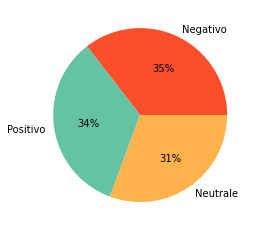

In [29]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df1["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('plots/sentiment_analysis/lp1_pieplt.png')
plt.show()

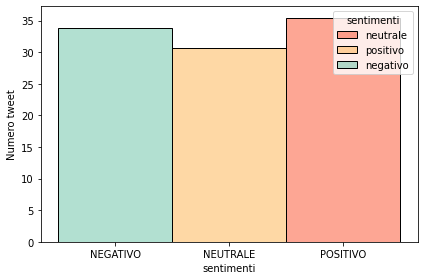

In [30]:
sns.set_palette("Set2")
colors = ["#66c2a4", '#feb24c','#fc4e2a']
#labels = ['negativo', 'positivo', 'neutrale']
sns.histplot(x="sentimenti", data=df1, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('plots/sentiment_analysis/lp1_barplt.png')

plt.show()

In [31]:
tok_pos = ' '.join(df1[df1['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['always',
 'loved',
 'aburkhartlaw',
 'thought',
 'conclusion',
 'far',
 'best',
 'effective',
 'recap',
 'many',
 'reason',
 'damn',
 'important',
 '👏👏',
 'depp',
 'v',
 'heard',
 'legal',
 'analysis',
 'week',
 'johnny',
 'depp',
 'trial',
 'v',
 'amber',
 'hea',
 'via',
 'youtube',
 'always',
 'loved',
 'aburkhartlaw',
 'thought',
 'conclusion',
 'far',
 'best',
 'effective',
 'recap',
 'many',
 'reason',
 'damn',
 'important',
 '👏👏',
 'depp',
 'v',
 'heard',
 'legal',
 'analysis',
 'week',
 'johnny',
 'depp',
 'trial',
 'v',
 'amber',
 'hea',
 'via',
 'youtube',
 'summer',
 'slather',
 'amica',
 'cream',
 'grab',
 'mega',
 'pint',
 'muffin',
 'side',
 'going',
 'best',
 'summer',
 'ever',
 'lucky',
 'might',
 'curry',
 'summer',
 'slather',
 'amica',
 'cream',
 'grab',
 'mega',
 'pint',
 'muffin',
 'side',
 'going',
 'best',
 'summer',
 'ever',
 'lucky',
 'might',
 'curry',
 'johnny',
 'depp',
 'loses',
 'amber',
 'heard',
 'trial',
 'could',
 'winning',
 'back',
 'reputation',
 '

In [32]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber      384
heard      282
depp       250
johnny     245
youtube    240
via        223
trial      124
love        97
friend      81
lol         75
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

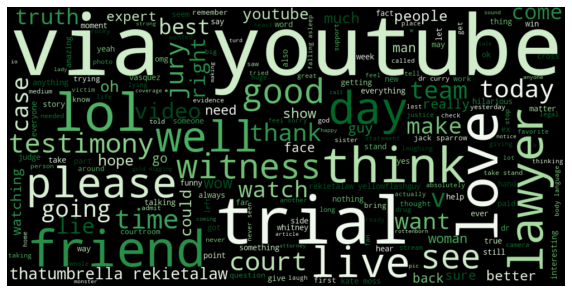

In [33]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp1_wc_pos.png')
plt.axis('off')

In [34]:
tok_neg= ' '.join(df1[df1['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()

In [35]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        461
heard        315
youtube      241
via          236
johnny       196
depp         186
time          86
trial         84
witness       79
testimony     67
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

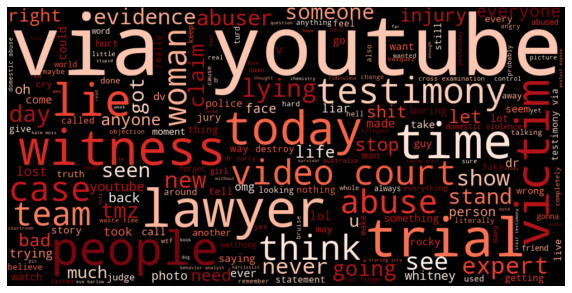

In [36]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp1_wc_neg.png')
plt.axis('off')

In [37]:
tok_neu= ' '.join(df1[df1['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['device',
 'court',
 '🤐',
 'device',
 'court',
 '🤐',
 'fact',
 '👏',
 'entire',
 'thing',
 'hearsay',
 'dr',
 'hughs',
 'cmon',
 'entire',
 'thing',
 'hearsay',
 'dr',
 'hughs',
 'cmon',
 'entire',
 'thing',
 'hearsay',
 'dr',
 'hughs',
 'cmon',
 'oh',
 'trying',
 'pas',
 'pic',
 '😂',
 'give',
 'girl',
 'let',
 'go',
 'billion',
 'amber',
 'heard',
 'dramatic',
 'reaction',
 'part',
 'via',
 'youtube',
 'hour',
 'uncut',
 'amber',
 'heard',
 'body',
 'language',
 'word',
 'v',
 'action',
 'via',
 'youtube',
 '#',
 'pt',
 'amberheard',
 'song',
 'lie',
 'lie',
 'lie',
 'n',
 'sync',
 'parody',
 'via',
 'youtube',
 'trending',
 'pt',
 'amberheard',
 'song',
 'lie',
 'lie',
 'lie',
 'n',
 'sync',
 'parody',
 'via',
 'youtube',
 'absolutely',
 '💯',
 'never',
 'let',
 'tro',
 'medium',
 'informed',
 'amber',
 'guy',
 'say',
 'exactly',
 'feel',
 'amber',
 'knight',
 'watch',
 'youtube',
 'han',
 'zimmer',
 'hoist',
 'colour',
 'pirate',
 'caribbean',
 'world',
 'end',
 'via',
 'youtube',
 '

In [38]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber      317
youtube    263
via        255
heard      248
depp       185
johnny     161
trial       96
day         60
v           51
witness     48
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

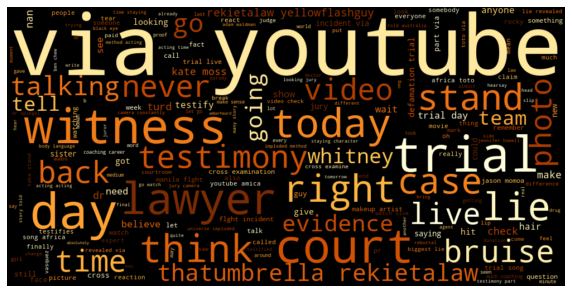

In [39]:
stopw2 = stopwords.words('english') 
stopw2.extend(['v', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp1_wc_neu.png')
plt.axis('off')

# COMUNITÀ 2

In [40]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df2 = pd.read_csv('../data_collection/data/df_lp_coms_2.csv')
del df2['Unnamed: 0']

In [41]:
df2

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,Unnamed: 0.1,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f
0,2022-05-05,1169921988430880768,witch_natural,Wanda (she/her) 💀❌,another thing everybody lying except team yeah...,[],0,0,1,facts evidence storytelling lies deppvsheard,[],NaN,"['another', 'thing', 'everybody', 'lying', 'ex...",1,19,131,5.285714,NaN
1,2022-05-13,1514012344489238532,soa_bia,Bia,wbpictures probably remove amber heard aquaman...,[],6,11,35,removeamberheard justiceforjohnnydepp deppvsh...,[],NaN,"['wbpictures', 'probably', 'remove', 'amber', ...",1,10,76,6.700000,amber
2,2022-05-14,1346648211876933632,ellie_ellie666,Ellie,accurate,[],0,0,1,istandwithamberheard deppvsheard,[],NaN,['accurate'],1,1,8,8.000000,NaN
3,2022-05-14,737279154823925760,cat_piller,Sassafrass🧜🏻‍♀️ #ThePhoenixAct,supporter attacking,[],0,0,2,depp lilyrosedepp deppheardtrial deppvsheard,[],NaN,"['supporter', 'attacking']",1,2,19,9.000000,NaN
4,2022-05-17,844312257848905728,lilimadsn1965,StraightenTheTiara,could walk courtroom kick people tmz u weekly ...,[],0,1,15,deppvsheard,[],NaN,"['could', 'walk', 'courtroom', 'kick', 'people...",1,11,62,4.727273,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2022-06-10,1522118627604205569,deppheardtruth,DeppHeardTruth,thought done tweeting detailed evidence show b...,"[{'screen_name': 'owenjones84', 'name': 'owen ...",3,3,31,amberheardlsanabuser justiceforjohnnydepp joh...,[],1710.0,"['thought', 'done', 'tweeting', 'detailed', 'e...",1,15,111,6.000000,NaN
1962,2022-06-10,1522118627604205569,deppheardtruth,DeppHeardTruth,thought done tweeting detailed evidence show b...,"[{'screen_name': 'owenjones84', 'name': 'owen ...",3,3,31,amberheardlsanabuser justiceforjohnnydepp joh...,[],1757.0,"['thought', 'done', 'tweeting', 'detailed', 'e...",1,15,111,6.000000,NaN
1963,2022-06-10,1522118627604205569,deppheardtruth,DeppHeardTruth,thought done tweeting detailed evidence show b...,"[{'screen_name': 'owenjones84', 'name': 'owen ...",3,3,31,amberheardlsanabuser justiceforjohnnydepp joh...,[],1774.0,"['thought', 'done', 'tweeting', 'detailed', 'e...",1,15,111,6.000000,NaN
1964,2022-06-04,1491604879873351682,memehoe50,DexterPoin,fwiw nonsensensical verdict nincompoop cannot ...,[],1,0,3,deppvsheard deppheard thejury,[],2922.0,"['fwiw', 'nonsensensical', 'verdict', 'nincomp...",1,22,166,6.590909,NaN


In [42]:
df2['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df2['tweet'].astype(str)]
df2['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df2['tweet'].astype(str)]
df2['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df2['tweet'].astype(str)]
df2['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df2['tweet'].astype(str)]

In [43]:
#imposto le soglie
df2['sentimenti']=''
df2.loc[df2.compound >= 0.001,'sentimenti']='POSITIVO'
df2.loc[df2.compound == 0,'sentimenti']='NEUTRALE'
df2.loc[df2.compound <= -0.001,'sentimenti']='NEGATIVO'

In [44]:
df2

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-05-05,1169921988430880768,witch_natural,Wanda (she/her) 💀❌,another thing everybody lying except team yeah...,[],0,0,1,facts evidence storytelling lies deppvsheard,...,1,19,131,5.285714,NaN,0.3818,0.124,0.547,0.328,POSITIVO
1,2022-05-13,1514012344489238532,soa_bia,Bia,wbpictures probably remove amber heard aquaman...,[],6,11,35,removeamberheard justiceforjohnnydepp deppvsh...,...,1,10,76,6.700000,amber,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-05-14,1346648211876933632,ellie_ellie666,Ellie,accurate,[],0,0,1,istandwithamberheard deppvsheard,...,1,1,8,8.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-05-14,737279154823925760,cat_piller,Sassafrass🧜🏻‍♀️ #ThePhoenixAct,supporter attacking,[],0,0,2,depp lilyrosedepp deppheardtrial deppvsheard,...,1,2,19,9.000000,NaN,-0.2263,0.588,0.000,0.412,NEGATIVO
4,2022-05-17,844312257848905728,lilimadsn1965,StraightenTheTiara,could walk courtroom kick people tmz u weekly ...,[],0,1,15,deppvsheard,...,1,11,62,4.727273,NaN,-0.4588,0.250,0.750,0.000,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2022-06-10,1522118627604205569,deppheardtruth,DeppHeardTruth,thought done tweeting detailed evidence show b...,"[{'screen_name': 'owenjones84', 'name': 'owen ...",3,3,31,amberheardlsanabuser justiceforjohnnydepp joh...,...,1,15,111,6.000000,NaN,-0.5574,0.282,0.602,0.116,NEGATIVO
1962,2022-06-10,1522118627604205569,deppheardtruth,DeppHeardTruth,thought done tweeting detailed evidence show b...,"[{'screen_name': 'owenjones84', 'name': 'owen ...",3,3,31,amberheardlsanabuser justiceforjohnnydepp joh...,...,1,15,111,6.000000,NaN,-0.5574,0.282,0.602,0.116,NEGATIVO
1963,2022-06-10,1522118627604205569,deppheardtruth,DeppHeardTruth,thought done tweeting detailed evidence show b...,"[{'screen_name': 'owenjones84', 'name': 'owen ...",3,3,31,amberheardlsanabuser justiceforjohnnydepp joh...,...,1,15,111,6.000000,NaN,-0.5574,0.282,0.602,0.116,NEGATIVO
1964,2022-06-04,1491604879873351682,memehoe50,DexterPoin,fwiw nonsensensical verdict nincompoop cannot ...,[],1,0,3,deppvsheard deppheard thejury,...,1,22,166,6.590909,NaN,-0.0772,0.081,0.851,0.068,NEGATIVO


In [45]:
df2["sentimenti"].value_counts()

NEGATIVO    920
POSITIVO    729
NEUTRALE    317
Name: sentimenti, dtype: int64

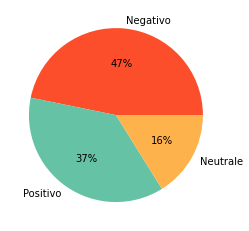

In [46]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df2["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')

plt.savefig("plots/sentiment_analysis/lp2_pieplt.png")
plt.show()

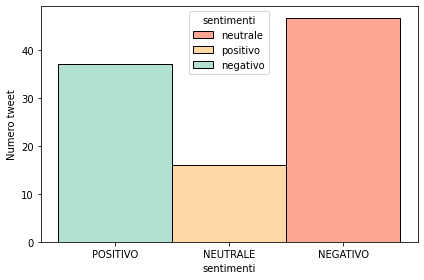

In [47]:
sns.set_palette("Set2")
colors = [ "#66c2a4", '#feb24c', '#fc4e2a']
#labels = ['negativo', 'positivo', 'neutrale']
sns.histplot(x="sentimenti", data=df2, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()

plt.savefig("plots/sentiment_analysis/lp2_barplt.png")
plt.show()

In [48]:
tok_pos = ' '.join(df2[df2['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['another',
 'thing',
 'everybody',
 'lying',
 'except',
 'team',
 'yeah',
 'right',
 'always',
 'want',
 'hear',
 'side',
 'story',
 'want',
 'believe',
 'people',
 'want',
 'see',
 'good',
 'everchanging',
 'etc',
 'everybody',
 'favorite',
 'part',
 'trial',
 'today',
 'whats',
 'many',
 'hospital',
 'door',
 'amber',
 'lick',
 'test',
 'positive',
 'covid',
 'day',
 'quarantine',
 'aclu',
 'heavily',
 'fought',
 'giving',
 'info',
 'donation',
 'trial',
 'judge',
 'could',
 'maintained',
 'paid',
 'came',
 'judge',
 'let',
 'compel',
 'info',
 'uninjured',
 'say',
 'showing',
 'jury',
 'photo',
 'massive',
 'shiner',
 'left',
 'eye',
 'clearly',
 'discussed',
 'testimony',
 'counsel',
 'changing',
 'lie',
 'judge',
 'ruining',
 'reputation',
 'allowing',
 'sham',
 'wonder',
 'many',
 'witness',
 'testify',
 'person',
 'amber',
 'compared',
 'many',
 'johnny',
 'supposedly',
 'best',
 'friend',
 'video',
 'deposition',
 'understand',
 'witness',
 'choose',
 'willing',
 'show',
 'per

In [49]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        124
depp          99
testimony     66
witness       62
evidence      59
friend        57
see           56
heard         56
case          52
clearly       50
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

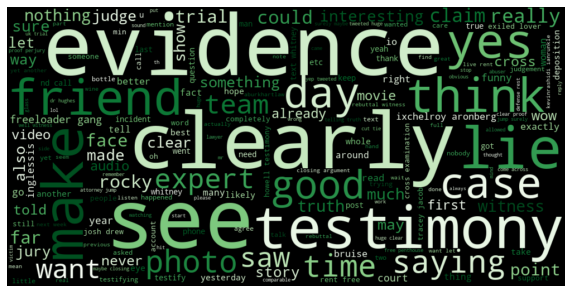

In [50]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df2
words = ' '.join([word for word in df2[df2['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp2_wc_pos.png')
plt.axis('off')

In [51]:
tok_neg= ' '.join(df2[df2['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['supporter',
 'attacking',
 'could',
 'walk',
 'courtroom',
 'kick',
 'people',
 'tmz',
 'u',
 'weekly',
 'cbs',
 'cnn',
 'attacked',
 'ok',
 'start',
 'cross',
 'u',
 'gonna',
 'spin',
 'favor',
 'tmz',
 'people',
 'sun',
 'u',
 'weekly',
 'overdrive',
 'right',
 'trying',
 'find',
 'angle',
 'make',
 'sound',
 'side',
 'attacking',
 'victim',
 'amber',
 'heard',
 'witness',
 'actually',
 'witness',
 'abuse',
 'depp',
 'complete',
 'opposite',
 'johnny',
 'depp',
 'witness',
 'least',
 '🤔',
 'uhhh',
 'rocky',
 'amber',
 'fight',
 'got',
 'physical',
 'oooohhhhh',
 'amber',
 'known',
 'wear',
 'hair',
 'extension',
 'seeing',
 'tie',
 'supposed',
 'clump',
 'hair',
 'ripped',
 'photographed',
 'wait',
 'let',
 'straight',
 'amber',
 'heard',
 'witness',
 'two',
 'ex',
 'friend',
 'psychologist',
 'say',
 'woman',
 'abuse',
 'men',
 'probably',
 'sister',
 'else',
 'raquel',
 'pennington',
 'none',
 'friend',
 'coming',
 'person',
 'neither',
 'io',
 'still',
 'friend',
 'starting',
 '

In [52]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        173
heard        114
evidence     114
witness      111
testimony     90
abuse         87
depp          76
😂             76
jury          74
time          71
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

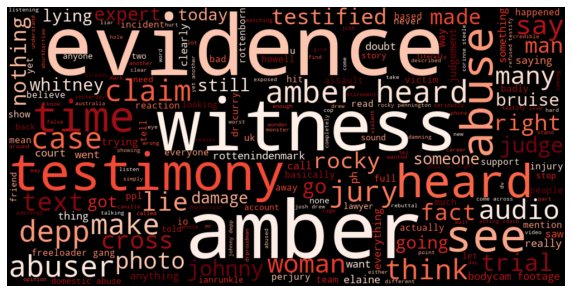

In [53]:
tweet_df = df2
words = ' '.join([word for word in df2[df2['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds').generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp2_wc_neg.png')
plt.axis('off')

In [54]:
tok_neu= ' '.join(df2[df2['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['wbpictures',
 'probably',
 'remove',
 'amber',
 'heard',
 'aquaman',
 'suggestion',
 'watch',
 'movie',
 'cinema',
 'accurate',
 'woooord',
 'salad',
 'rocky',
 'cocaine',
 'amber',
 'handful',
 'time',
 'mushroom',
 'time',
 'johnny',
 'cocaine',
 'implied',
 'never',
 'used',
 'think',
 'maybe',
 'inconsistent',
 'deposition',
 'tiring',
 '💀',
 'judge',
 'penney',
 'whenever',
 'elaine',
 'start',
 'talking',
 'tasya',
 'omfg',
 'f',
 'count',
 'ten',
 'definitely',
 'trouble',
 'counting',
 'amber',
 'heard',
 'version',
 'johnny',
 'depp',
 'finger',
 'story',
 '💀',
 'listen',
 'heard',
 'witness',
 'think',
 'rebuttal',
 'done',
 'right',
 'erase',
 'statement',
 '😅',
 'amberstan',
 'realamberheard',
 '🤣🤣let',
 'guess',
 'watched',
 'day',
 'trial',
 '👍',
 'f',
 'jennifer',
 'howell',
 'get',
 'testify',
 'trial',
 'completely',
 'erase',
 'every',
 'single',
 'word',
 'whitney',
 'testimony',
 '😅',
 'feel',
 'attorney',
 'fee',
 'went',
 'coaching',
 'see',
 'body',
 'cam',
 'f

In [55]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        60
heard        46
😂            38
think        24
evidence     24
witness      22
depp         21
day          18
jury         18
testimony    17
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

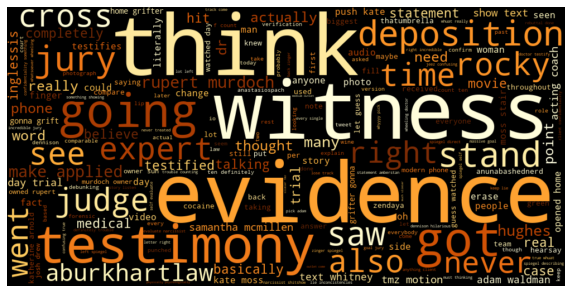

In [56]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine', 'realamberheard'])

tweet_df = df2
words = ' '.join([word for word in df2[df2['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp2_wc_neu.png')
plt.axis('off')

# COMUNITÀ 3

In [57]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df3 = pd.read_csv('../data_collection/data/df_lp_coms_3.csv')
del df3['Unnamed: 0']

In [58]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-27,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,nice people stopped saying bpd hpd form npd di...,[],3,0,0,johnnydeppvsamberheard deppvsheard,...,1,17,117,5.555556,NaN,-0.0772,0.196,0.670,0.134,NEGATIVO
1,2022-04-26,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,deposition x longer need got message loud clea...,[],0,1,28,deppvsheard johnnydeppvsamberheard justicefor...,...,1,17,109,5.470588,NaN,-0.2500,0.228,0.644,0.129,NEGATIVO
2,2022-04-29,1471277982664769545,rosiepilsbury,Rosie✨🌷🪴,believe wish tomorrow monday could keep going ...,[],3,0,29,johnnydeppvsamberheard deppvsheard deppheardt...,...,1,8,51,5.500000,NaN,0.4019,0.000,0.722,0.278,POSITIVO
3,2022-05-01,1240483469794435077,brelana88,Bre 🏴‍☠️🪷,hope come next defamation min biased bullcrap ...,"[{'screen_name': '60mins', 'name': '60 minutes...",2,0,14,justiceforjohnnydepp johnnydepp deppvsheard j...,...,1,15,89,5.000000,johnny,-0.5994,0.377,0.483,0.140,NEGATIVO
4,2022-05-01,1389997216014688259,govchad,Florida Farmer ,literally,[],0,0,0,deppvsheard depptrial depp,...,1,1,9,9.000000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,2022-05-27,217418435,spacekidette,Space Kidette Rando 007🚀,case misogyny amber claim world applauding que...,[],0,2,18,deppvsheardtrial johnnydeppisinnocent deppheard,...,1,14,100,6.214286,amber,0.4767,0.000,0.807,0.193,POSITIVO
10779,2022-05-28,1522000591232200705,parlousbitch,whitney heard’s tampon applicator,watching uncivillaw stream right goddamn kurt ...,"[{'screen_name': 'uncivillaw', 'name': 'uncivi...",2,0,5,lawtube uncivillaw deppheard,...,1,20,156,6.850000,NaN,-0.2263,0.240,0.554,0.207,NEGATIVO
10780,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,...,1,6,38,5.500000,NaN,-0.2960,0.354,0.417,0.229,NEGATIVO
10781,2022-06-07,2535482316,uncivillaw,Uncivil Law 🤠,monica lewinsky join depp heard stupid,[],15,8,73,,...,1,6,38,5.500000,NaN,-0.2960,0.354,0.417,0.229,NEGATIVO


In [59]:
df3['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df3['tweet'].astype(str)]
df3['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df3['tweet'].astype(str)]
df3['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df3['tweet'].astype(str)]
df3['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df3['tweet'].astype(str)]

In [60]:
#imposto le soglie
df3['sentimenti']=''
df3.loc[df3.compound >= 0.001,'sentimenti']='POSITIVO'
df3.loc[df3.compound == 0,'sentimenti']='NEUTRALE'
df3.loc[df3.compound <= -0.001,'sentimenti']='NEGATIVO'

In [61]:
df3

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,549318485,blancacobb,Blanca Cobb,careful saying word honestly derivation word h...,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,6,deppvsheard,...,1,15,125,6.875000,NaN,0.8979,0.000,0.460,0.540,POSITIVO
1,2022-04-12,549318485,blancacobb,Blanca Cobb,silent dislike flutter eye blink sister testim...,"[{'screen_name': 'courttv', 'name': 'court tv'...",1,2,15,amberheard johnnydepp bodylanguage deppvsheard,...,1,20,155,6.090909,amber,-0.1531,0.157,0.709,0.134,NEGATIVO
2,2022-04-12,549318485,blancacobb,Blanca Cobb,careful saying word honestly derivation word h...,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,6,deppvsheard,...,1,15,125,6.875000,NaN,0.8979,0.000,0.460,0.540,POSITIVO
3,2022-04-12,549318485,blancacobb,Blanca Cobb,silent dislike flutter eye blink sister testim...,"[{'screen_name': 'courttv', 'name': 'court tv'...",1,2,15,amberheard johnnydepp bodylanguage deppvsheard,...,1,20,155,6.090909,amber,-0.1531,0.157,0.709,0.134,NEGATIVO
4,2022-04-12,549318485,blancacobb,Blanca Cobb,careful saying word honestly derivation word h...,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,6,deppvsheard,...,1,15,125,6.875000,NaN,0.8979,0.000,0.460,0.540,POSITIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2022-06-08,1515122725060108288,anyaglows,Anna,thatumbrella hey man 👋 u pls 🙏 emphasize busin...,[],0,0,2,amberheard johnnydeppisinnocent johnnydeppamb...,...,1,23,126,4.521739,NaN,-0.3818,0.131,0.811,0.059,NEGATIVO
1832,2022-06-08,1074757149748854792,itsadriienne,Adriienne F.,jackrice ashleycourttv courttv took stand prep...,"[{'screen_name': 'ashleycourttv', 'name': 'ash...",0,0,2,johnnydeppamberheardtrial amberheard johnnyde...,...,1,11,100,6.769231,NaN,0.8176,0.000,0.486,0.514,POSITIVO
1833,2022-06-08,1074757149748854792,itsadriienne,Adriienne F.,jackrice ashleycourttv courttv took stand prep...,"[{'screen_name': 'ashleycourttv', 'name': 'ash...",0,0,2,johnnydeppamberheardtrial amberheard johnnyde...,...,1,11,100,6.769231,NaN,0.8176,0.000,0.486,0.514,POSITIVO
1834,2022-06-11,1523463331352391681,ptown49,Amy Horrell,josh richman johnny depps best friend yr chari...,"[{'screen_name': 'theemilydbaker', 'name': 'em...",0,2,4,johnnydeppamberheardtrial johnnydepp amberheard,...,1,20,136,5.850000,johnny,0.8957,0.000,0.560,0.440,POSITIVO


In [62]:
df3["sentimenti"].value_counts()

POSITIVO    684
NEGATIVO    611
NEUTRALE    541
Name: sentimenti, dtype: int64

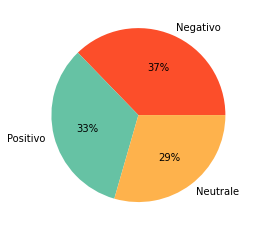

In [63]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df3["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('plots/sentiment_analysis/lp3_pieplt.png')
plt.show()

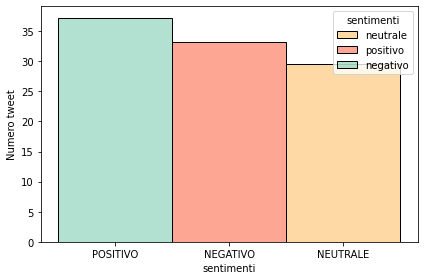

In [64]:
sns.set_palette("Set2")
colors = ["#66c2a4", '#fc4e2a','#feb24c']
#labels = ['negativo', 'positivo', 'neutrale']
sns.histplot(x="sentimenti", data=df3, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('plots/sentiment_analysis/lp3_barplt.png')
plt.show()

In [65]:
tok_pos = ' '.join(df3[df3['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['careful',
 'saying',
 'word',
 'honestly',
 'derivation',
 'word',
 'honest',
 'answering',
 'question',
 'come',
 'across',
 'truthful',
 'trying',
 'convince',
 'courttv',
 'courttvuk',
 'careful',
 'saying',
 'word',
 'honestly',
 'derivation',
 'word',
 'honest',
 'answering',
 'question',
 'come',
 'across',
 'truthful',
 'trying',
 'convince',
 'courttv',
 'courttvuk',
 'careful',
 'saying',
 'word',
 'honestly',
 'derivation',
 'word',
 'honest',
 'answering',
 'question',
 'come',
 'across',
 'truthful',
 'trying',
 'convince',
 'courttv',
 'courttvuk',
 'dr',
 'david',
 'kipper',
 'great',
 'witness',
 'corrected',
 'something',
 'ensure',
 'accuracy',
 'boost',
 'credibility',
 'something',
 'true',
 'corrected',
 'info',
 'remember',
 'liar',
 'opposite',
 'courttv',
 'courttvuk',
 'winner',
 'trial',
 'tired',
 '😔',
 'courttvuk',
 'courttv',
 'chanleycourttv',
 'rest',
 'country',
 'getting',
 'ready',
 'monday',
 'courttv',
 'nbcnews',
 'lawcrimenetwork',
 'livenowfox',


In [66]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

courttv          273
amber            108
heard             82
ashleycourttv     69
witness           63
depp              57
johnny            51
jury              47
testimony         45
well              42
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

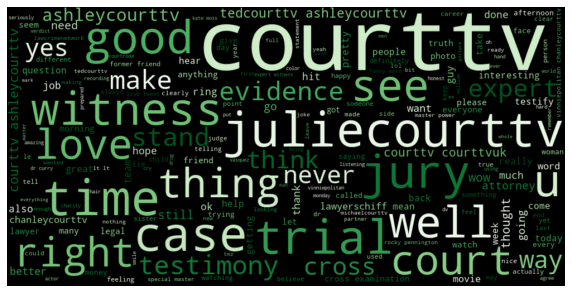

In [67]:

stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('plots/sentiment_analysis/lp3_wc_pos.png')

plt.axis('off')

In [68]:
tok_neg= ' '.join(df3[df3['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['silent',
 'dislike',
 'flutter',
 'eye',
 'blink',
 'sister',
 'testimony',
 'amber',
 'questioning',
 'dior',
 'wanted',
 'work',
 'johnny',
 'paraphrased',
 'response',
 'gt',
 'dior',
 'represents',
 'class',
 'want',
 'work',
 'courttv',
 'silent',
 'dislike',
 'flutter',
 'eye',
 'blink',
 'sister',
 'testimony',
 'amber',
 'questioning',
 'dior',
 'wanted',
 'work',
 'johnny',
 'paraphrased',
 'response',
 'gt',
 'dior',
 'represents',
 'class',
 'want',
 'work',
 'courttv',
 'silent',
 'dislike',
 'flutter',
 'eye',
 'blink',
 'sister',
 'testimony',
 'amber',
 'questioning',
 'dior',
 'wanted',
 'work',
 'johnny',
 'paraphrased',
 'response',
 'gt',
 'dior',
 'represents',
 'class',
 'want',
 'work',
 'courttv',
 'pay',
 'attention',
 'non',
 'contracted',
 'statement',
 'someone',
 'speaks',
 'formally',
 'baseline',
 'behavior',
 'reason',
 'figure',
 'courttv',
 'courttvuk',
 'johnny',
 'showed',
 'vulnerable',
 'side',
 'today',
 'childhood',
 'abuse',
 'resulting',
 'num

In [69]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

courttv          208
amber            136
heard             98
depp              82
johnny            52
testimony         49
juliecourttv      49
ashleycourttv     48
think             43
lawyer            39
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

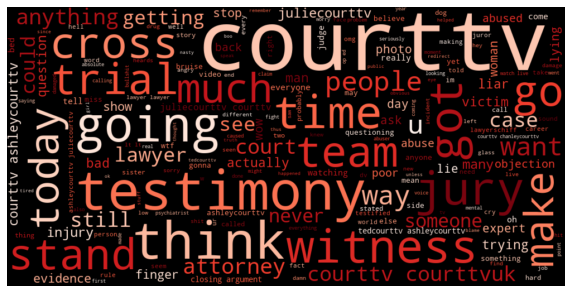

In [70]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')

plt.savefig('plots/sentiment_analysis/lp3_wc_neg.png')
plt.axis('off')

In [71]:

tok_neu= ' '.join(df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['literally',
 'dr',
 'hughes',
 'regurgitating',
 'someone',
 'else',
 'fact',
 'remember',
 'report',
 'advocatingfreed',
 'judge',
 'catch',
 'meeeeeeee',
 'advocatingfreed',
 'judge',
 'catch',
 'meeeeeeee',
 'advocatingfreed',
 'judge',
 'catch',
 'meeeeeeee',
 'rewatching',
 'coverage',
 'last',
 'week',
 'difference',
 'dr',
 'hughes',
 'dr',
 'curry',
 'astonishing',
 'come',
 'across',
 'forensic',
 'psychologist',
 'come',
 'across',
 'hired',
 'advocate',
 'woman',
 'ahs',
 'testimony',
 'prof',
 'judge',
 'others',
 'standard',
 'action',
 'amber',
 'heard',
 'jussie',
 'smollett',
 'body',
 'language',
 'word',
 'v',
 'action',
 'funniest',
 'shit',
 'seen',
 'day',
 '😂',
 'think',
 'remove',
 'amber',
 'heard',
 'aclu',
 'ambassador',
 'sign',
 'petition',
 'via',
 'change',
 'someone',
 'gonna',
 'need',
 'bigger',
 'bus',
 'tt',
 'er',
 'going',
 'field',
 'day',
 'legalbytesmedia',
 'theemilydbaker',
 'gave',
 'u',
 'non',
 'coke',
 'head',
 'lesson',
 'coke',
 'coming

In [72]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber              501
heard              272
johnny             244
theemilydbaker     200
elaine             200
legalbytesmedia    191
dr                 185
witness            182
depp               163
camille            139
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

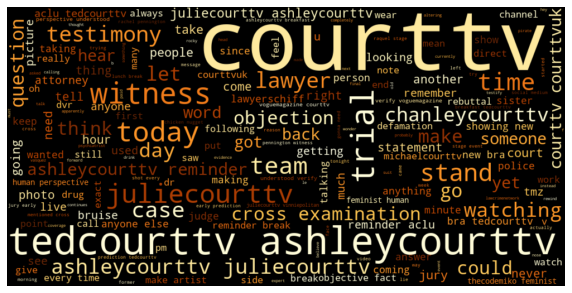

In [73]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')

plt.savefig('plots/sentiment_analysis/lp3_wc_neu.png')
plt.axis('off')

In [74]:
df.to_csv('../data_collection/data/df_sentiment_lp.csv')